# In this lab activity you are going to classify a set of networks based on features extracted by hand

In [74]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from statistics import mean 
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

## Load the data


**Train networks are in the folder `Train networks` in the form of `networkx.edgelist` together with class labels (`train_labels.npy`)**

**Test networks are in the folder `Test networks` in the form of `networkx.edgelist` together with class labels (`test_labels.npy`)**

In [63]:
##Load the edge lists
import networkx as nx
y_test = np.load('Test Networks/test_labels.npy')
y_train = np.load('Train networks/train_labels.npy')

In [3]:
import os

x_test_g = []
x_train_g = []

x_test = []
x_train = []

for filename in os.listdir('Test Networks'):
    if filename.endswith(".edgelist"): 
        G = nx.read_edgelist(os.path.join('Test Networks', filename), nodetype=int)
        x_test_g.append(G)
        x_test.append(np.array(G))
    
        continue
    else:
        continue
        
for filename in os.listdir('Train networks'):
    if filename.endswith(".edgelist"): 
        G = nx.read_edgelist(os.path.join('Train networks', filename), nodetype=int)
        x_train_g.append(G)
        x_train.append(np.array(G))
        
        continue
    else:
        continue        
x_test = np.array(x_test_g)
x_train = np.array(x_train_g)

<ipython-input-3-07f260022f40>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test = np.array(x_test_g)
<ipython-input-3-07f260022f40>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train = np.array(x_train_g)


In [4]:
x_test.shape

(48,)

In [5]:
x_train.shape

(300,)

In [6]:
y_train.shape

(300,)

In [7]:
y_test.shape

(48,)

In [8]:
x_train_g[0]

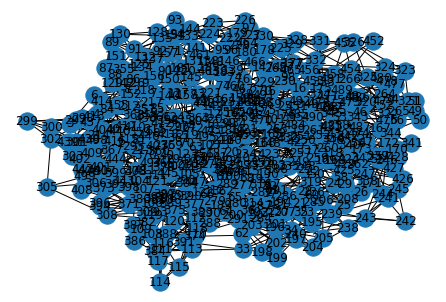

In [9]:
#x_test
nx.draw(x_train_g[1],with_labels=True)
plt.draw()
plt.show()

In [10]:
sorted (nx.degree_centrality(x_train_g[1]).items(), key = lambda x: x[1], reverse=True)[0:6]

[(252, 0.02004008016032064),
 (103, 0.02004008016032064),
 (420, 0.018036072144288574),
 (263, 0.018036072144288574),
 (163, 0.018036072144288574),
 (466, 0.018036072144288574)]

In [11]:
sorted (nx.closeness_centrality(x_train_g[1]).items(), key = lambda x: x[1], reverse=True)[0:6]

[(252, 0.2682795698924731),
 (18, 0.2631856540084388),
 (103, 0.26194225721784775),
 (253, 0.2612565445026178),
 (349, 0.26098326359832635),
 (32, 0.25922077922077924)]

In [12]:
mean(list (nx.closeness_centrality(x_train_g[1]).values()))

0.23607747992416372

In [13]:
sorted (nx.betweenness_centrality(x_train_g[1]).items(), key = lambda x: x[1], reverse=True)[0:6]

[(263, 0.02283817595351271),
 (103, 0.022501511603463472),
 (252, 0.022231796006192725),
 (18, 0.018072074329165678),
 (349, 0.01745487892083106),
 (469, 0.017220480111290584)]

In [14]:
mean(nx.betweenness_centrality(x_train_g[1]).values())

0.006516019991790811

In [15]:
sorted (nx.eigenvector_centrality(x_train_g[1]).items(), key = lambda x: x[1], reverse=True)[0:6]

[(252, 0.09303863283977067),
 (249, 0.08277072555007098),
 (163, 0.0740138034094904),
 (466, 0.0738626624335144),
 (295, 0.0731255364794943),
 (251, 0.07282205779545642)]

In [16]:
mean(list(nx.eigenvector_centrality(x_train_g[1]).values()))

0.04321677020209871

In [19]:
nx.average_shortest_path_length(x_train_g[3]) #.items(), key = lambda x: x[1], reverse=True

7.108288577154308

In [37]:
pred_pre = nx.preferential_attachment(x_train_g[1])

In [38]:
pred_pre_dict = {}
for u , v , p in pred_pre:
    pred_pre_dict[(u,v)]= p

In [45]:
#sorted (pred_pre_dict.items(), key = lambda x: x[1], reverse=True)[0:10]
len (list(pred_pre_dict.values()))

123250

In [31]:
nx.density(x_train_g[1])

0.012024048096192385

In [62]:
len (list (nx.communicability_betweenness_centrality(x_train_g[1]).values())) #average_neighbor_degree(x_train_g[1]).values()

500

In [45]:
from statistics import mean 

mean(nx.degree_centrality(x_train_g[1]).values())

0.012024048096192383

In [93]:
## Feature extraction

Extract some structural features from the networks. You decide which one to consider (*e.g.* transitivity, average path length and so on and so forth).
Represent each network as a vector whose components correspond to the extracted features.

<span style="color:red"> **Justify all of your decisions.** </span>

**Reminder: If the network is very large, the computation of some quantities could be very time consuming. In that case you could fall back on sampling techniques**

SyntaxError: invalid syntax (<ipython-input-93-14cc4c1c2f47>, line 3)

300

In [91]:
arr.shape

(300, 5)

In [92]:
y_train.shape

(300,)

## Feature extraction

Extract some structural features from the networks. You decide which one to consider (*e.g.* transitivity, average path length and so on and so forth).
Represent each network as a vector whose components correspond to the extracted features.

<span style="color:red"> **Justify all of your decisions.** </span>

**Reminder: If the network is very large, the computation of some quantities could be very time consuming. In that case you could fall back on sampling techniques**

In [31]:
## Feature extraction
def feature_extraction(data):
    degree_centrality = []
    degree_associvity = []
    transivity = []
    closeness_centrality = []
    betweenness_cetrality = []
    degree_pearson = []
    average_neighbor = []
    degree_asocivity =[]
    #average_node_connec = []
    density = []
    avearge_clustering = []
    for i in data:
        degree_centrality.append (mean(nx.degree_centrality(i).values()))
        transivity.append(nx.transitivity(i))
        closeness_centrality.append(mean(list (nx.closeness_centrality(i).values())))
        betweenness_cetrality.append (mean(nx.betweenness_centrality(i).values()))
        density.append(nx.density(i))
        degree_associvity.append(nx.degree_assortativity_coefficient(i))
        degree_pearson.append(nx.degree_pearson_correlation_coefficient(i))
        average_neighbor.append(mean(nx.average_neighbor_degree(i).values()))
        degree_asocivity.append(nx.degree_assortativity_coefficient(i))
        #average_node_connec.append(nx.average_node_connectivity(i))
        avearge_clustering.append(nx.average_clustering(i))
        
    return degree_centrality,transivity, closeness_centrality, betweenness_cetrality,density,degree_pearson,average_neighbor,degree_asocivity,avearge_clustering
    
#average_shortest_path.append(nx.average_shortest_path_length(i))


In [32]:
training_set = feature_extraction(x_train_g)

In [21]:
#sorted (nx.degree_centrality(x_train_g[1]).items(), key = lambda x: x[1], reverse=True)

#mean(dict(sorted(nx.average_neighbor_degree(x_train_g[0]).items(), key = lambda x:x)).values())
degree_asocivity = []
for i in x_train_g:
     degree_asocivity.append(nx.average_clustering(i))

In [27]:
nx.average_shortest_path_length(x_train_g[0])

4.954837675350701

In [201]:
mean(nx.average_neighbor_degree(x_train_g[0]).values())

4.401961111111111

In [33]:
testing_set = feature_extraction(x_test_g)

In [34]:
degree_centrality = np.array(training_set[0])
transivity = np.array(training_set[1])
closeness_centrality = np.array(training_set[2])
betweenness_cetrality = np.array(training_set[3])
density = np.array(training_set[4])
degree_pearson = np.array(training_set[5])
average_neighbor= np.array(training_set[6])
degree_asocivity= np.array(training_set[7]) 
avearge_clustering = np.array(training_set[8]) 

degree_centrality_te = np.array(testing_set[0])
transivity_te = np.array(testing_set[1])
closeness_centrality_te = np.array(testing_set[2])
betweenness_cetrality_te = np.array(testing_set[3])
density_te = np.array(testing_set[4])
degree_pearson_te = np.array(testing_set[5])
average_neighbor_te= np.array(testing_set[6])
degree_asocivity_te= np.array(testing_set[7])
avearge_clustering_te = np.array(testing_set[8]) 

In [98]:
# density,degree_centrality,transivity, closeness_centrality, betweenness_cetrality,degree_pearson,average_neighbor,degree_asocivity,avearge_clustering
# density_te,degree_centrality_te,transivity_te, closeness_centrality_te, betweenness_cetrality_te,degree_pearson_te,average_neighbor_te,degree_asocivity_te,avearge_clustering_te
taining_arr = np.vstack((density,degree_centrality , closeness_centrality, degree_pearson)).T #degree_centrality,transivity, closeness_centrality, betweenness_cetrality,degree_pearson,average_neighbor,degree_asocivity,)).T
testing_arr = np.vstack((density_te,degree_centrality_te,closeness_centrality_te,degree_pearson_te)).T#degree_centrality_te,transivity_te, closeness_centrality_te, betweenness_cetrality_te,degree_pearson_te,average_neighbor_te,degree_asocivity_te,)).T

In [99]:
taining_arr.shape
testing_arr.shape

(48, 4)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(taining_arr, y_train, test_size=0.33, random_state=42)

In [91]:
y_train.shape

(300,)

## Mutlti-label Classification

**Consider a classification model that you assume to be appropriate for this exercise and evaluate its performance** 


<span style="color:red"> **Justify all of your decisions and remember to cross-validate if hyperparameters are present in the model.** </span>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Embedding)           (None, None, 100)         400       
_________________________________________________________________
layer2 (LSTM)                (None, None, 64)          42240     
_________________________________________________________________
layer3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
layer4 (Dropout)             (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 55,089
Trainable params: 55,089
Non-trainable params: 0
_________________________________________________________________


In [103]:
##Multi-label classification
#Split the training dataset into k-folds using K-fold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


KfRidge = KFold(n_splits=10)

def GridSearch(cv,X_train,y_train,X_test,y_test):
    
    if cv == KfRidge:
        print ("Split mechannism KFOLD")
        
    #scoring = {'accuracy': make_scorer(accuracy_score),
         #  'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
        
    k_range = list(range(1,31))
    weight_options = ["uniform", "distance"]

    #param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
    #knn = KNeighborsClassifier()
    
    parameters = dict(n_neighbors = k_range, weights = weight_options)
    
    
    ''' {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }'''
    
    #clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

# A sample parameter    
        
    

        
    model = KNeighborsClassifier()
    #parameters = dict(n_neighbors = k_range, weights = weight_options)
    
    Grid_Search_Ridge = GridSearchCV(model,parameters,refit=True,cv = cv, scoring='accuracy')
    Grid_Search_Ridge.fit(X_train,y_train)
    grid_results = Grid_Search_Ridge.cv_results_['mean_test_score']
    print()
    print("Mean_test_Score :")
    print(grid_results)
    print()
    print("Best model :")
    best_model = Grid_Search_Ridge.best_estimator_
    print (best_model)
    best_model.fit(X_train,y_train)
    print()
    print("Score best model :")
    scores_best_model = best_model.score(X_train, y_train)
    test = best_model.score(X_test, y_test)
    print("Train score :",scores_best_model)
    print("Test score :",test)
    return "Overall Mean score :"+ str(grid_results.mean())

In [97]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(taining_arr,y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/home/mose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 3
Selected Features: [ True  True False  True False False False False False]
Feature Ranking: [1 1 4 1 5 2 7 3 6]


/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
#X_train, X_test, y_train, y_test 
GridSearch(KfRidge,taining_arr,y_train,testing_arr,y_test)

Split mechannism KFOLD

Mean_test_Score :
[0.27       0.27       0.18       0.27       0.24666667 0.28
 0.32       0.32       0.30666667 0.33666667 0.30333333 0.33666667
 0.34       0.35333333 0.33666667 0.36333333 0.39333333 0.36333333
 0.36666667 0.36333333 0.37666667 0.36666667 0.38666667 0.37333333
 0.40333333 0.37666667 0.39333333 0.37666667 0.41       0.37
 0.43       0.37333333 0.43333333 0.38666667 0.43666667 0.38666667
 0.45666667 0.39       0.46       0.39333333 0.46333333 0.39666667
 0.48       0.39666667 0.48333333 0.4        0.5        0.39666667
 0.47666667 0.40333333 0.48666667 0.40333333 0.50666667 0.40333333
 0.50333333 0.40333333 0.50666667 0.40666667 0.51666667 0.40333333]

Best model :
KNeighborsClassifier(n_neighbors=30)

Score best model :
Train score : 0.53
Test score : 0.25


'Overall Mean score :0.38727777777777767'

In [105]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, taining_arr, y_train, cv=5)
scores.mean()

0.3866666666666667

In [ ]:
taining_arr,y_train,testing_arr,y_test)

In [291]:
# extract features
feature_extractor = RecursiveFeatureExtractor(x_train_g[3])
features = feature_extractor.extract_features()
features

,degree(mean)(mean),degree(sum)(mean),external_edges(mean)(mean),internal_edges(mean)(mean),degree(mean),degree(sum),external_edges(mean),external_edges(sum),internal_edges(mean),degree,external_edges,internal_edges
0,13.524261,173.333333,73.662393,68.574911,12.000000,144.0,64.833333,778.0,60.250000,12,68,44
1,14.731689,212.083333,95.295252,72.050085,14.250000,171.0,101.166667,1214.0,62.583333,12,83,50
2,10.335323,101.428571,56.378087,36.764286,9.714286,68.0,50.285714,352.0,30.428571,7,31,22
3,12.592610,162.222222,51.122773,60.293425,12.888889,116.0,53.555556,482.0,60.777778,9,41,42
4,14.519783,217.714286,51.260866,86.426822,15.000000,210.0,50.714286,710.0,91.000000,14,46,89
...,...,...,...,...,...,...,...,...,...,...,...,...
495,15.480658,258.714286,101.406376,79.669856,16.428571,230.0,103.857143,1454.0,85.642857,14,134,55
496,14.665090,209.900000,88.470085,74.796280,14.300000,143.0,90.800000,908.0,66.700000,10,73,40
497,17.403354,318.230769,97.273115,109.105381,18.230769,237.0,104.923077,1364.0,115.769231,13,122,64
498,12.884727,163.500000,56.164744,61.159642,12.642857,177.0,55.285714,774.0,60.428571,14,53,69


In [240]:
np.zeros((10, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [250]:
np.arange(1,4)

array([1, 2, 3])

In [246]:
lis = ['a', 'b', 'c','d' ]
for i , j in enumerate(lis):
    print(i)
    
n = 10
matrix = np.zeros((n,2)) # Pre-allocate matrix
for i in range(1,n):
    matrix[i,:] = [3*i, i**2]    

0
1
2
3


In [287]:
feat = np.zeros((len(x_train_g), 16))
for j, k in enumerate (x_train_g):
    feature_extractor = RecursiveFeatureExtractor(k)
    fearure = feature_extractor.extract_features()
   # print("graph ",k)
    for column, i in enumerate (fearure.columns):
        feat[j,:]= [fearure[i].mean() for i in fearure.columns]
        print("column ",column, "graph ",j)
        print( fearure[i])

column  0 graph  0
0      4.350627
1      4.692315
2      4.519101
3      4.266071
4      4.487054
         ...   
495    4.647222
496    3.968056
497    4.265278
498    4.685556
499    4.280278
Name: degree(mean)(mean)(mean), Length: 500, dtype: float64
column  1 graph  0
0      14.789532
1      14.417037
2      14.664815
3      13.563095
4      13.614881
         ...    
495    13.923611
496    14.042130
497    13.517361
498    14.447569
499    14.570794
Name: external_edges(mean)(mean)(mean), Length: 500, dtype: float64
column  2 graph  0
0      4.622056
1      5.118889
2      5.115556
3      5.040675
4      5.141071
         ...   
495    5.037500
496    4.192130
497    4.437500
498    4.929236
499    4.605463
Name: internal_edges(mean)(mean)(mean), Length: 500, dtype: float64
column  3 graph  0
0      4.586667
1      4.066667
2      4.533333
3      4.712500
4      4.245238
         ...   
495    3.750000
496    4.638889
497    4.233333
498    4.079167
499    4.777778
Name: degree(

ValueError: cannot copy sequence with size 18 to array axis with dimension 16

In [267]:
features['degree(mean)(mean)(mean)'].mean()

4.384996208585286

In [276]:
feat

array([[ 4.38499621, 13.7811013 ,  4.7653598 , ...,  4.        ,
        12.808     ,  4.342     ],
       [ 4.38499621, 13.7811013 ,  4.7653598 , ...,  4.        ,
        12.808     ,  4.342     ],
       [ 4.38499621, 13.7811013 ,  4.7653598 , ...,  4.        ,
        12.808     ,  4.342     ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [266]:
features.columns

Index(['degree(mean)(mean)(mean)', 'external_edges(mean)(mean)(mean)',
       'internal_edges(mean)(mean)(mean)', 'degree(mean)(mean)',
       'degree(sum)(mean)', 'external_edges(mean)(mean)',
       'internal_edges(mean)(mean)', 'degree(mean)', 'degree(sum)',
       'external_edges(mean)', 'external_edges(sum)', 'internal_edges(mean)',
       'internal_edges(sum)', 'degree', 'external_edges', 'internal_edges'],
      dtype='object')

In [237]:
len(feat)

90

In [183]:
nx.degree_assortativity_coefficient(x_train_g[1])

-0.06256728726831763

In [133]:
clf = LogisticRegression(random_state=0).fit(taining_arr, y_train)
clf.predict(taining_arr)
#clf.predict_proba(X[:2, :])
clf.score(testing_arr,y_test)


0.25

# Network inference

**You will try one of the assigned algorithms (`ARaCNe`,`MRNet` or `WGCNA`) on the [Golub dataset](http://portals.broadinstitute.org/cgi-bin/cancer/publications/pub_paper.cgi?paper_id=43) which contains microarray data measured from two classes of leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).**

In [ ]:
## Load the data
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("gedm.csv", header=0, index_col=0)
print("n_samples = {} | n_variables = {}".format(*data.shape))

n_samples, n_variables = data.shape
data.head()

#### Remove rows that start with AFFX and select a sub-matrix

In [ ]:
data.drop(data.index[data.index.str.startswith('AFFX')], inplace=True)
X = data.iloc[np.random.randint(0, data.shape[0], 30), :].values.T
print(X.shape)

In [ ]:
data.head()

## Data is ready, implement the assigned method!